# How Utilize Potential Lanscape Masking for Isolating Dots in Dot Array

In [1]:
import os
from pathlib import Path
path = Path(os.getcwd())

# update base working directory to QuDiPy
if path.stem != 'QuDiPy':
    base_dir = path.parents[1]
    os.chdir(base_dir)
else:
    base_dir = path

In [2]:
import numpy as np
from qudipy.system.dot_array import DotArray

In [3]:
nav_dir = os.path.join('QuDiPy data', 'tutorials')
processed_dir = os.path.join(base_dir, nav_dir,
                            'processed','3QD_processed')
nextnano_dir = os.path.join(base_dir, nav_dir,
                                    'nextnano','3QD')
n_dots = 3      # anticipated number of dots
file_prefix = 'tutorial'

In [4]:
pts = [4,3,4,3,4]
ctrl_vals = [
    np.linspace(0.2, 0.35, pts[0]),
    np.linspace(0.0, 0.15, pts[1]),
    np.linspace(0.2, 0.35, pts[2]),
    np.linspace(0.0, 0.15, pts[3]),
    np.linspace(0.2, 0.35, pts[4])]

In [5]:
# constuct dor array system using harsh masking routine
dots = DotArray(n_dots, ctrl_ranges=ctrl_vals, def_masking='harsh', calc=None)
dots.numeric(processed_dir, nextnano_dir, file_prefix)

Note: No effective parameter calcualtions specified. Default = "spin". 



## 1.3 Test dot splitting and masking

The splitting procedure creates a list of new Dots objects. 
They inherit all properties from the parent object _except_:
1. potential interpolator
`dots_object.potential(ctrl_vals)` now outputs masked potential
2. the positions of visible dots __*(counted from 1)*__ may change.

Splitting group can be either `'single'`/`'singles'` (default) for individual dots, 
or `'pair'`/`'pairs'` for adjacent pairs.


> **Note**: if the number of quantum dots decreases for any control value coordinates, then the potential landscape returns `NaN`s, since the quantum dot system must be dot invariant for the present applications. 

> `NaN`s are not displayed when plotting

## Harsh masking applied to potential landscape

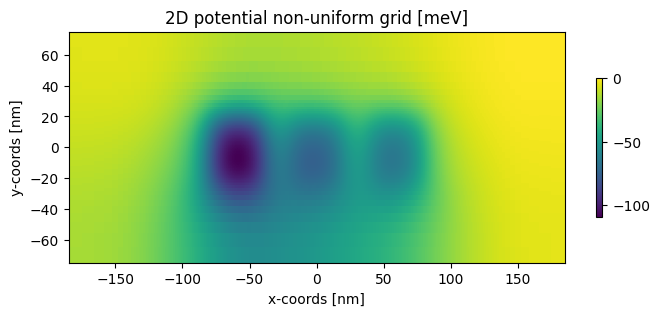

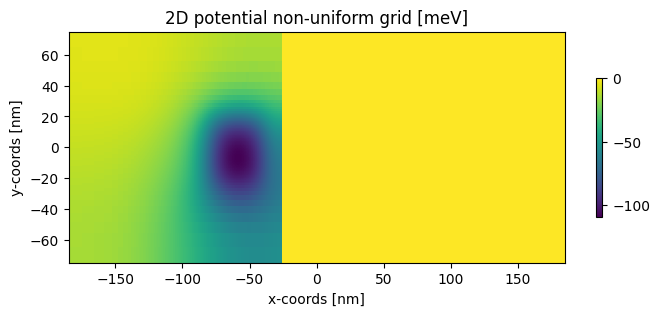

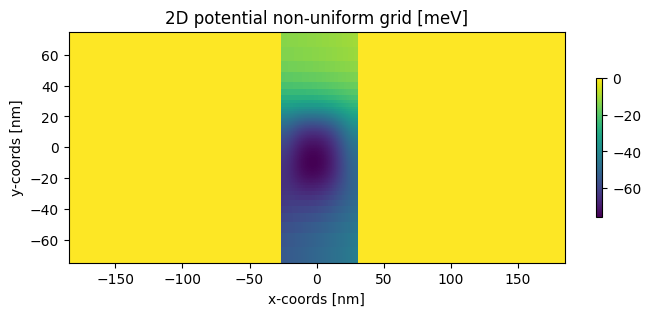

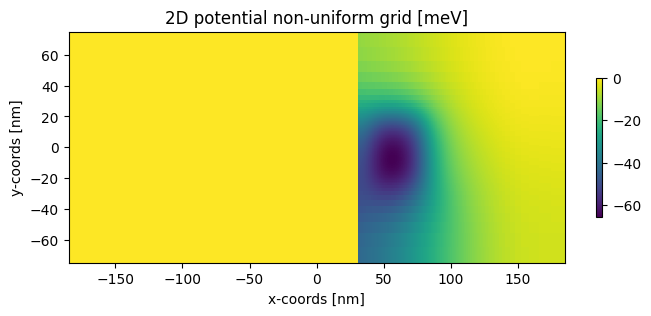

In [6]:
# choose voltage control values
voltage_config = [0.35,0.0,0.2,0.0,0.2]

# split dot array system into individual dots or pairs or dots
dot1, dot2, dot3 = dots.split(group='single')

# plot unmasked potential
dots.potential.plot(voltage_config)

# define bounds for all 2D potential plots 
u_max = np.max(dots.potential(voltage_config))
u_min = np.min(dots.potential(voltage_config))

# plot masked potentials using guassian mask routine
dot1.potential.plot(voltage_config, cbar_bounds=[u_min, u_max])
dot2.potential.plot(voltage_config, cbar_bounds=[u_min, u_max])
dot3.potential.plot(voltage_config, cbar_bounds=[u_min, u_max])

## Gaussian masking applied to potential landscape

Similar to the harsh masking, we can specify a masking routine that fits an inverted
guassian curve to the bottom of the 1D potential slices for all local minima.
**NOTE:** This is the default masking routine.

Note: No effective parameter calcualtions specified. Default = "spin". 



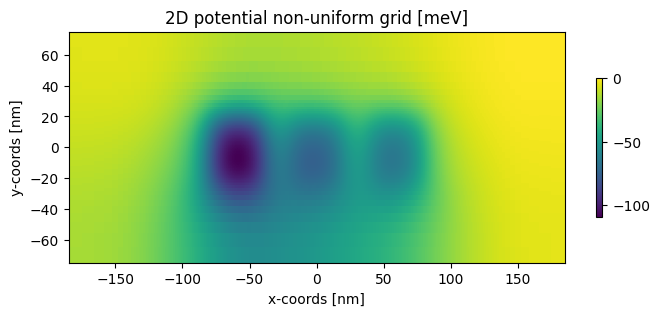

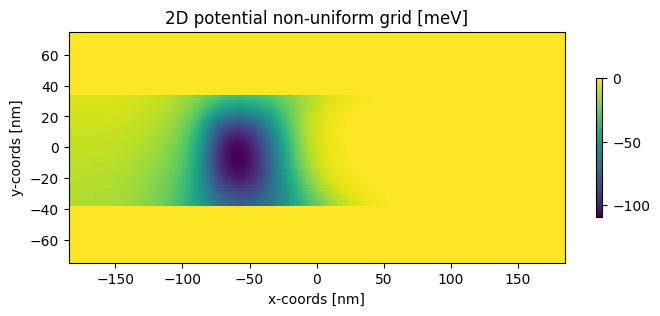

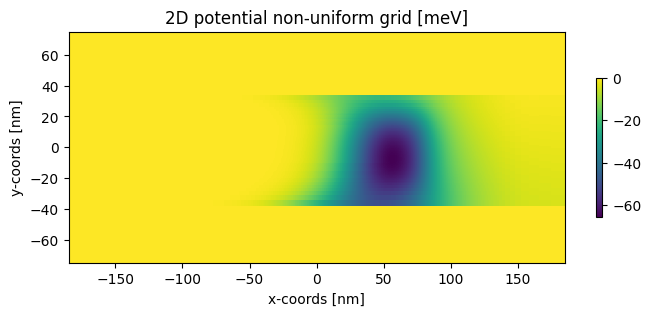

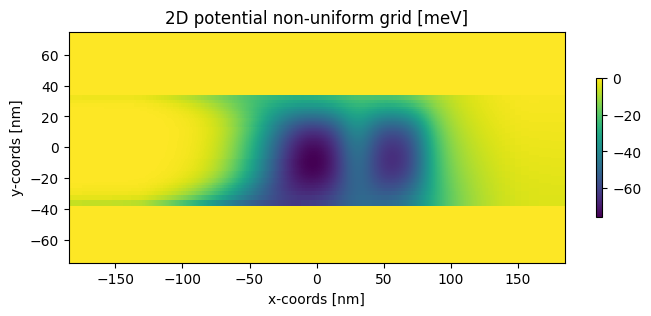

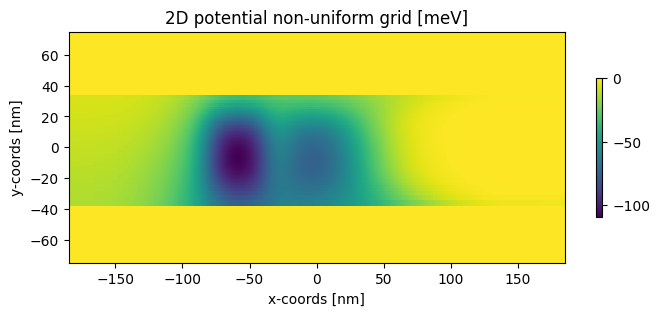

In [9]:
# constuct dor array system using DEFAULT gaussian masking routine
dots = DotArray(n_dots, ctrl_ranges=ctrl_vals, def_masking='gaussian', calc=None)
dots.numeric(processed_dir, nextnano_dir, file_prefix)

# split dot array system into individual dots or pairs or dots
dot1, dot2, dot3 = dots.split(group='single')
dotpair1, dotpair2 = dots.split(group='pair')

# plot unmasked potential
dots.potential.plot(voltage_config)

# define bounds for all 2D potential plots 
u_max = np.max(dots.potential(voltage_config))
u_min = np.min(dots.potential(voltage_config))

# plot masked potentials using guassian mask routine
dot1.potential.plot(voltage_config, cbar_bounds=[u_min, u_max])
dot3.potential.plot(voltage_config, cbar_bounds=[u_min, u_max])
dotpair2.potential.plot(voltage_config, cbar_bounds=[u_min, u_max])
dotpair1.potential.plot(voltage_config, cbar_bounds=[u_min, u_max])

Similar to defining the masking method during Dots object creation, the masking
method can be specified in the split method.

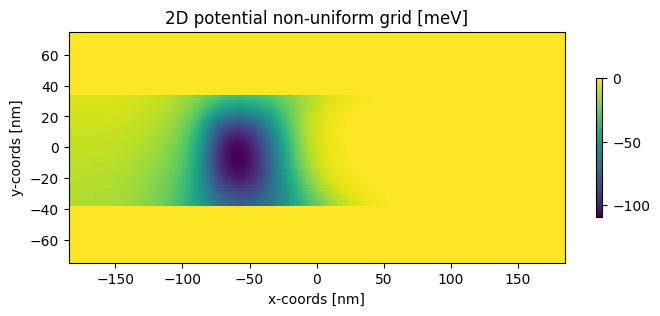

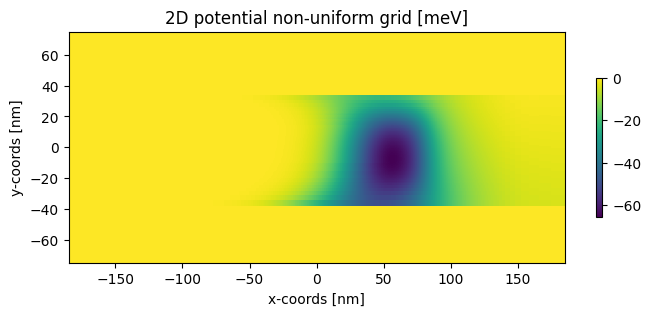

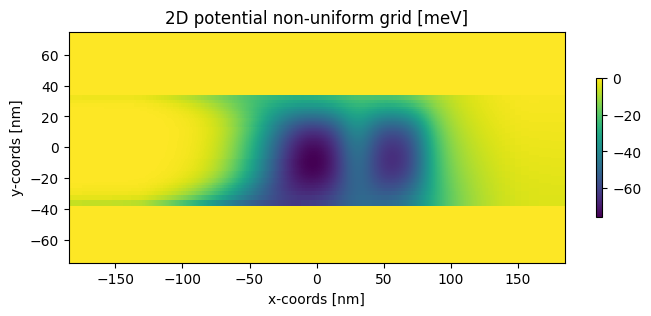

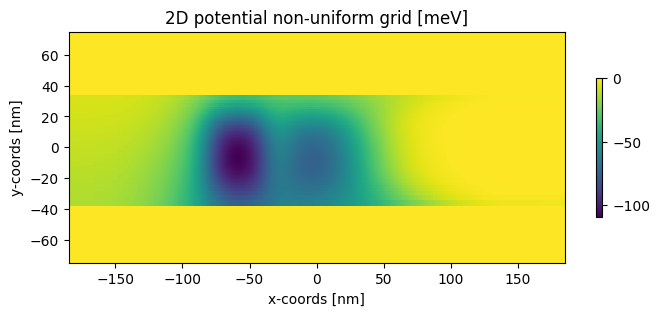

In [10]:
dot1, dot2, dot3 = dots.split(group='single', masking='Gaussian')
dotpair1, dotpair2 = dots.split(group='pair', masking='gauss')

u_max = np.max(dots.potential(voltage_config))
u_min = np.min(dots.potential(voltage_config))

dot1.potential.plot(voltage_config,cbar_min=u_min, cbar_max=u_max)
dot3.potential.plot(voltage_config,cbar_min=u_min, cbar_max=u_max)
dotpair2.potential.plot(voltage_config,cbar_min=u_min, cbar_max=u_max)
dotpair1.potential.plot(voltage_config,cbar_min=u_min, cbar_max=u_max)